In [1]:
# Gerekli kütüphaneleri yükleyin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Veri setini yükle
file_path = "/content/Trafik_Verileri.csv"  # Yüklediğin dosyanın yolunu yaz
data = pd.read_csv(file_path)

# İlk birkaç satırı incele
print(data.head())


             DATE_TIME   LATITUDE  LONGITUDE GEOHASH  MINIMUM_SPEED  \
0  2024-12-01 00:00:00  40.998230  29.064331  sxk9jr            4.0   
1  2024-12-01 00:00:00  40.998230  29.284058  sxkc4r           69.0   
2  2024-12-01 00:00:00  40.959778  29.306030  sxkc4b           20.0   
3  2024-12-01 00:00:00  40.959778  29.295044  sxkc48            1.0   
4  2024-12-01 00:00:00  40.970764  29.273071  sxkc44            4.0   

   MAXIMUM_SPEED  AVERAGE_SPEED  NUMBER_OF_VEHICLES  
0          140.0           62.0               198.0  
1          145.0           92.0                56.0  
2           68.0           43.0                 5.0  
3          153.0           44.0                78.0  
4          142.0           76.0               204.0  


In [3]:
# Eksik değerleri kontrol et
print(data.isnull().sum())

# Eksik verileri çıkar veya doldur (örnek: ortalama ile doldurma)
data = data.dropna()  # Alternatif: data.fillna(data.mean(), inplace=True)


DATE_TIME             0
LATITUDE              0
LONGITUDE             0
GEOHASH               0
MINIMUM_SPEED         0
MAXIMUM_SPEED         0
AVERAGE_SPEED         0
NUMBER_OF_VEHICLES    0
dtype: int64


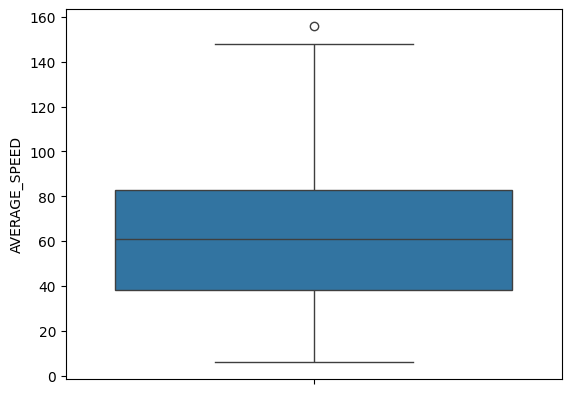

In [4]:
# Aykırı değerleri görselleştirme
sns.boxplot(data["AVERAGE_SPEED"])
plt.show()

# Aykırı değerleri temizleme (örneğin, %99 persentil üstünü çıkarma)
q_high = data["AVERAGE_SPEED"].quantile(0.99)
data = data[data["AVERAGE_SPEED"] < q_high]


In [5]:
# Tarih saat sütununu datetime formatına çevir
data["DATE_TIME"] = pd.to_datetime(data["DATE_TIME"])

# Yeni özellikler oluştur
data["Hour"] = data["DATE_TIME"].dt.hour
data["Day"] = data["DATE_TIME"].dt.day
data["Weekday"] = data["DATE_TIME"].dt.weekday  # Pazartesi = 0, Pazar = 6


In [6]:
# Standartlaştırma
scaler = StandardScaler()
scaled_columns = ["MINIMUM_SPEED", "MAXIMUM_SPEED", "AVERAGE_SPEED", "NUMBER_OF_VEHICLES"]
data[scaled_columns] = scaler.fit_transform(data[scaled_columns])


In [7]:
# Hedef değişken ve özellikler
X = data[["Hour", "Day", "Weekday", "MINIMUM_SPEED", "MAXIMUM_SPEED", "NUMBER_OF_VEHICLES"]]
y = data["AVERAGE_SPEED"]

# Veriyi eğitim ve test seti olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Tahmin yap ve performansı ölç
y_pred_lr = lr_model.predict(X_test)
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))

# RMSE hesaplama
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression R2 Score: 0.913109344773367
MAE: 0.21858696744692666
RMSE: 0.2931920311301535


In [14]:
# Tahmin yap ve performansı ölç
y_pred_rf = rf_model.predict(X_test)
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
# Calculate RMSE without using 'squared' argument
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("RMSE:", rmse)

Random Forest R2 Score: 0.9248863549167833
MAE: 0.19459615836178065
RMSE: 0.27259949372839776


In [16]:
# Tahmin yap ve performansı ölç
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting R2 Score:", r2_score(y_test, y_pred_gb))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
# Calculate RMSE using np.sqrt if squared argument is not available
#print("RMSE:", mean_squared_error(y_test, y_pred_gb, squared=False))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb))) # Use np.sqrt for older scikit-learn versions

Gradient Boosting R2 Score: 0.9311595404797337
MAE: 0.1899251855770158
RMSE: 0.2609681497051935


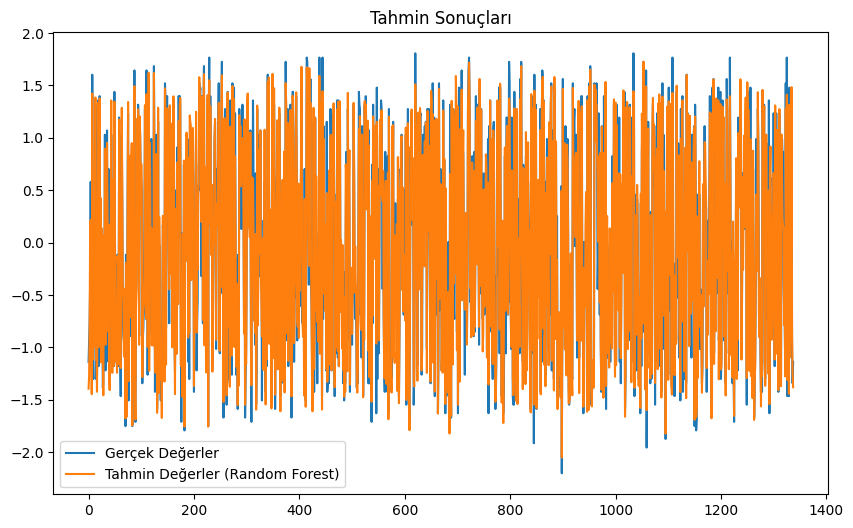

In [17]:
# Gerçek ve tahmin değerlerini karşılaştır
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Gerçek Değerler")
plt.plot(y_pred_rf, label="Tahmin Değerler (Random Forest)")
plt.legend()
plt.title("Tahmin Sonuçları")
plt.show()


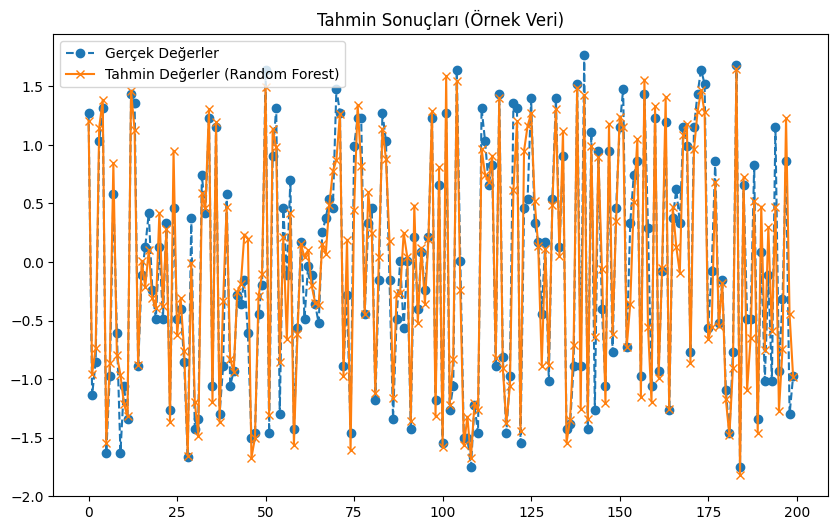

In [18]:
sample_indices = np.random.choice(len(y_test), size=200, replace=False)
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[sample_indices], label="Gerçek Değerler", linestyle="--", marker="o")
plt.plot(y_pred_rf[sample_indices], label="Tahmin Değerler (Random Forest)", linestyle="-", marker="x")
plt.legend()
plt.title("Tahmin Sonuçları (Örnek Veri)")
plt.show()


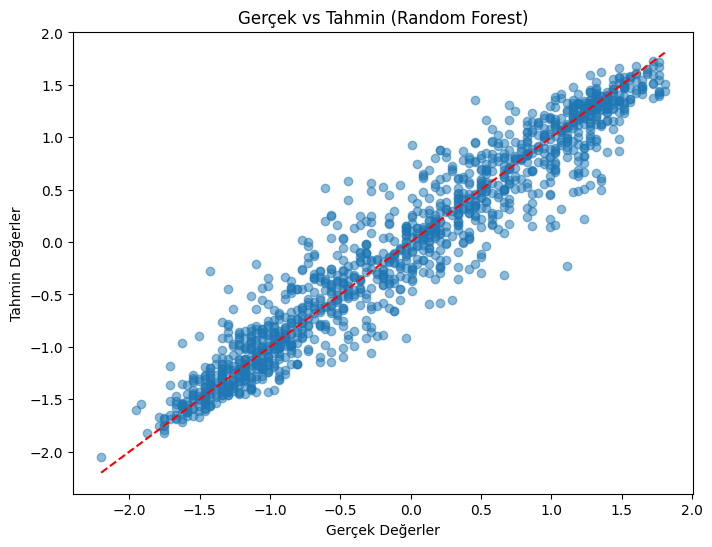

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Değerler")
plt.title("Gerçek vs Tahmin (Random Forest)")
plt.show()


In [20]:
from sklearn.svm import SVR

# SVR modelini tanımla
svr_model = SVR(kernel='rbf')  # 'rbf' kernel genelde iyi sonuç verir

# Modeli eğit
svr_model.fit(X_train, y_train)

# Tahmin yap ve performansı ölç
y_pred_svr = svr_model.predict(X_test)

# Performans metrikleri
print("Support Vector Regression R2 Score:", r2_score(y_test, y_pred_svr))
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))


Support Vector Regression R2 Score: 0.9284943951383111
MAE: 0.194910134624588
RMSE: 0.26597184650920386


In [21]:
# Performans sonuçlarını bir araya getir
results = {
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting", "SVR"],
    "R2 Score": [r2_score(y_test, y_pred_lr),
                 r2_score(y_test, y_pred_rf),
                 r2_score(y_test, y_pred_gb),
                 r2_score(y_test, y_pred_svr)],
    "MAE": [mean_absolute_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_rf),
            mean_absolute_error(y_test, y_pred_gb),
            mean_absolute_error(y_test, y_pred_svr)],
    "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_lr)),
             np.sqrt(mean_squared_error(y_test, y_pred_rf)),
             np.sqrt(mean_squared_error(y_test, y_pred_gb)),
             np.sqrt(mean_squared_error(y_test, y_pred_svr))]
}

# Tabloyu DataFrame ile göster
results_df = pd.DataFrame(results)
print(results_df)


               Model  R2 Score       MAE      RMSE
0  Linear Regression  0.913109  0.218587  0.293192
1      Random Forest  0.924886  0.194596  0.272599
2  Gradient Boosting  0.931160  0.189925  0.260968
3                SVR  0.928494  0.194910  0.265972


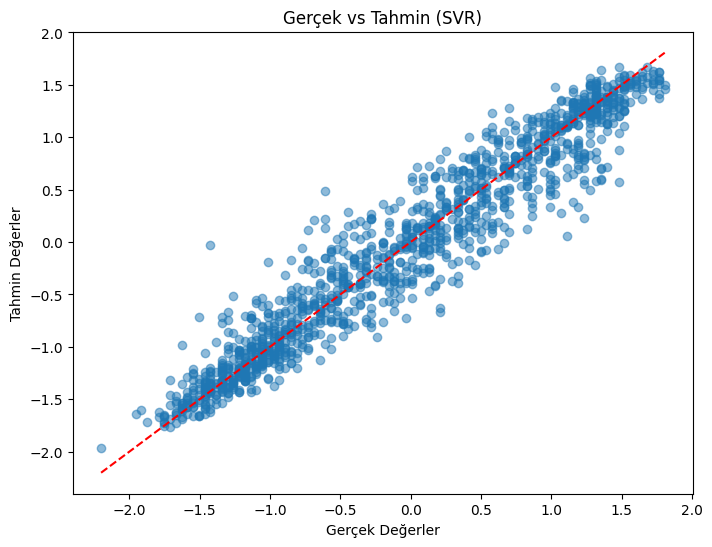

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Değerler")
plt.title("Gerçek vs Tahmin (SVR)")
plt.show()


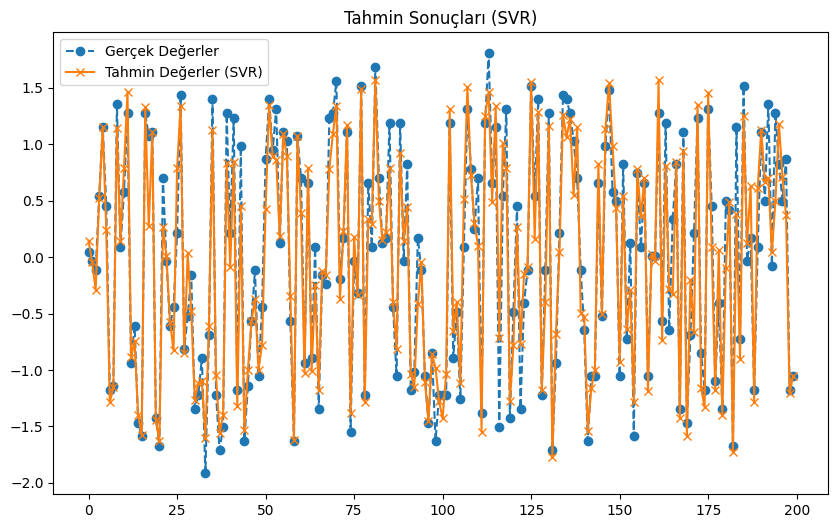

In [23]:
sample_indices = np.random.choice(len(y_test), size=200, replace=False)
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[sample_indices], label="Gerçek Değerler", linestyle="--", marker="o")
plt.plot(y_pred_svr[sample_indices], label="Tahmin Değerler (SVR)", linestyle="-", marker="x")
plt.legend()
plt.title("Tahmin Sonuçları (SVR)")
plt.show()


In [24]:
# Performans sonuçlarını bir tabloya ekleyelim
results = {
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting", "SVR"],
    "R2 Score": [r2_score(y_test, y_pred_lr),
                 r2_score(y_test, y_pred_rf),
                 r2_score(y_test, y_pred_gb),
                 r2_score(y_test, y_pred_svr)],
    "MAE": [mean_absolute_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_rf),
            mean_absolute_error(y_test, y_pred_gb),
            mean_absolute_error(y_test, y_pred_svr)],
    "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_lr)),
             np.sqrt(mean_squared_error(y_test, y_pred_rf)),
             np.sqrt(mean_squared_error(y_test, y_pred_gb)),
             np.sqrt(mean_squared_error(y_test, y_pred_svr))]
}

# Tabloyu oluştur ve yazdır
results_df = pd.DataFrame(results)
print(results_df)


               Model  R2 Score       MAE      RMSE
0  Linear Regression  0.913109  0.218587  0.293192
1      Random Forest  0.924886  0.194596  0.272599
2  Gradient Boosting  0.931160  0.189925  0.260968
3                SVR  0.928494  0.194910  0.265972
